### Credit card Fraud detection
---------
Get data
validate insigtes
visualize the insights
Train test split
models 
pick the best model and validate the ROC_AUC curve.

In [1]:
import numpy as np
import pandas as pd

#Important Classical ML algorithma
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Ensemble Techniques
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
#Gaussian processes
from sklearn.gaussian_process import GaussianProcessClassifier

#Navies Bayes
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [88]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#To read the data in CSV
credit_df = pd.read_csv(r'C:\Users\manoj.n.d\Documents\Data Scientist work\creditcard.csv')
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#First column is a time column
#Amount is in $
#class says the transaction is fraud or not

In [4]:
credit_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit_df.shape

(284807, 31)

In [7]:
#No Missing values
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Now lets see the distribution of the class
credit_df['Class'].value_counts()
#We have only 492 Fraud transactions

0    284315
1       492
Name: Class, dtype: int64

In [9]:
#This dataset is imbalanced.
#SO we just split the data into ligit and fraud 
ligit = credit_df[credit_df['Class']==0]
fraud = credit_df[credit_df['Class']==1]

In [10]:
ligit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
#Statistical data
ligit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud['Amount'].describe()
#We get to know mean is 122

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
#Lets compare the both transaction
credit_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


No of Fraud transaction is 492.

In [15]:
legit_sample = ligit.sample(n=492)
#We are just taking the sample of the 492 of ligit sample dataset


In [19]:
legit_sample.shape

(492, 31)

In [20]:
new_dataset = pd.concat([legit_sample,fraud], axis=0)
new_dataset.shape

(984, 31)

In [21]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
112996,72884.0,0.905896,-1.329138,-0.306269,-0.431063,-0.987453,-0.483767,-0.042420,-0.161009,-0.977081,...,-0.275354,-0.811725,-0.269906,0.046997,0.336206,1.070454,-0.123631,0.026392,254.96,0
247120,153465.0,0.326098,0.650589,-0.741738,-0.522982,1.653991,0.035289,0.946228,-0.111813,0.115666,...,-0.287792,-0.679877,-0.016763,-0.520510,-0.682023,-0.650328,-0.034161,-0.098880,9.99,0
22204,32103.0,1.146632,0.032115,0.641518,0.780886,-0.560925,-0.491637,-0.058954,-0.041488,0.098278,...,-0.151047,-0.293088,0.005268,0.584612,0.411239,0.235684,-0.024682,0.008579,21.52,0
138844,82876.0,-1.962011,1.735194,-1.341755,-1.784127,1.463639,3.155953,-0.932160,2.255814,-0.244121,...,-0.179971,-0.766205,0.056057,1.010118,0.113293,0.324553,0.138318,0.106645,1.00,0
222093,142818.0,-1.764427,0.912446,-0.118161,4.635792,1.232367,0.708566,0.535861,-0.376976,-0.817284,...,-0.053787,1.285716,0.757470,0.682490,-1.153415,0.221189,-0.561331,-0.232199,9.43,0


In [22]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [23]:
new_dataset.groupby('Class').mean()
#The mean value is not having so much difference compare to earlier, so we can use this 
#if we had more difference then we should have looked for more options.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93149.719512,0.016548,-0.057153,-0.056068,-0.048101,-0.073844,0.101131,-0.095816,0.008678,-0.013937,...,-0.017568,0.033427,-0.040298,0.011136,-0.019826,0.008591,0.001265,-0.026265,-0.004093,96.929187
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [33]:
x=new_dataset.drop('Class', axis=1)
y=new_dataset['Class']

In [34]:
print(x.shape)
print('***********')
print(y.shape)

(984, 30)
***********
(984,)


In [ ]:
#Holdout approach a cross validation technique
#Totally, 1) Holdout apprach 2) Leave one out approach 3)K-fold approach (Best for regression) 4) Stratified K-fold apprach

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
print('X-Train',x_train.shape)
print('x-Test',x_test.shape)
print('********')
print('Y-Train',y_train.shape)
print('y_test',y_test.shape)

X-Train (787, 30)
x-Test (197, 30)
********
Y-Train (787,)
y_test (197,)


#Ensemble Techniques
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
#Gaussian processes
from sklearn.gaussian_process import GaussianProcessClassifier

#Navies Bayes
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [92]:
lgc = LogisticRegression()
dtc = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgbc = XGBClassifier()
etc = ExtraTreesClassifier()
adc = AdaBoostClassifier()
gpc = GaussianProcessClassifier()
bernoulli = BernoulliNB()
gnb = GaussianNB()

In [93]:
models = [lgc,dtc,svc,knn,rfc,gbc,xgbc,etc,adc,gpc,bernoulli,gnb]

In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [94]:
def best_model(models):
    for mod in range(len(models)):
        best_model = models[mod]
        pipe = make_pipeline(StandardScaler(), best_model)
        fitting_training= pipe.fit(x_train, y_train)
        train_prediction = pipe.predict(x_train)
        test_prediction = pipe.predict(x_test)
        print(f'Training_accuracy of model {models[mod]} is {accuracy_score(y_train,train_prediction)}')
        print(f'Test_accuracy of model {models[mod]} is {accuracy_score(test_prediction,y_test)}')
        print(f'Classification report of {models[mod]} is {classification_report(y_test, test_prediction)}')
        print('*'*30)

In [95]:
best_model(models)

Training_accuracy of model LogisticRegression() is 0.9555273189326556
Test_accuracy of model LogisticRegression() is 0.934010152284264
Classification report of LogisticRegression() is               precision    recall  f1-score   support

           0       0.90      0.98      0.94        99
           1       0.98      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

******************************
Training_accuracy of model DecisionTreeClassifier() is 1.0
Test_accuracy of model DecisionTreeClassifier() is 0.8984771573604061
Classification report of DecisionTreeClassifier() is               precision    recall  f1-score   support

           0       0.89      0.91      0.90        99
           1       0.91      0.89      0.90        98

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weig

In [96]:
def best_model1(models):
    for mod in range(len(models)):
        best_model = models[mod]
        pipe = best_model
        fitting_training= pipe.fit(x_train, y_train)
        train_prediction = pipe.predict(x_train)
        test_prediction = pipe.predict(x_test)
        print(f'Training_accuracy of model {models[mod]} is {accuracy_score(y_train,train_prediction)}')
        print(f'Test_accuracy of model {models[mod]} is {accuracy_score(test_prediction,y_test)}')
        print(f'Classification report of {models[mod]} is {classification_report(y_test, test_prediction)}')
        print('*'*30)

In [97]:
best_model1(models)

Training_accuracy of model LogisticRegression() is 0.9529860228716646
Test_accuracy of model LogisticRegression() is 0.934010152284264
Classification report of LogisticRegression() is               precision    recall  f1-score   support

           0       0.91      0.96      0.94        99
           1       0.96      0.91      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

******************************
Training_accuracy of model DecisionTreeClassifier() is 1.0
Test_accuracy of model DecisionTreeClassifier() is 0.8934010152284264
Classification report of DecisionTreeClassifier() is               precision    recall  f1-score   support

           0       0.88      0.92      0.90        99
           1       0.91      0.87      0.89        98

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weig

In [ ]:
#There is a difference of making the data standardization and the accuracy of the model has increased.

In [80]:
skfold = StratifiedKFold(n_splits=30)

In [98]:
def best_model2(models):
    for mod in range(len(models)):
        best_model = cross_val_score(estimator=models[mod],X=x,y=y,cv=skfold, n_jobs=-1,verbose=2)
        print(f'Training_accuracy of model {models[mod]} is {np.mean(best_model)}')
        print('*'*30)

In [99]:
best_model2(models)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Training_accuracy of model LogisticRegression() is 0.9377209595959596
******************************


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Training_accuracy of model DecisionTreeClassifier() is 0.9102272727272727
******************************


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Training_accuracy of model SVC() is 0.4772727272727273
******************************
Training_accuracy of model KNeighborsClassifier() is 0.470770202020202
******************************


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Training_accuracy of model RandomForestClassifier() is 0.9420138888888889
******************************


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Training_accuracy of model GradientBoostingClassifier() is 0.9440025252525253
******************************


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Training_accuracy of model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) is 0.9460858585858586
******************************


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Training_accuracy of model ExtraTreesClassifier() is 0.9389835858585859
******************************


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Training_accuracy of model AdaBoostClassifier() is 0.9348484848484849
******************************


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Training_accuracy of model GaussianProcessClassifier() is 0.5080176767676767
******************************
Training_accuracy of model BernoulliNB() is 0.9022727272727273
******************************
Training_accuracy of model GaussianNB() is 0.8614583333333333
******************************


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


In [86]:
test_prediction = gbc.predict(x_test)

0.9135745207173779


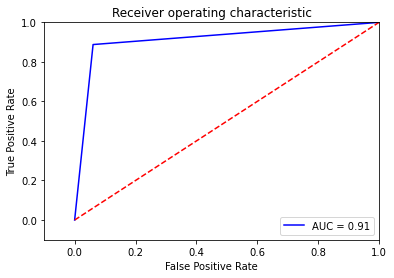

In [90]:
#This seems a very good model
fpr,tpr,thresholds = roc_curve(y_test,test_prediction)
roc_auc = auc(fpr,tpr)
print(roc_auc)
#Plot ROC
plt.title('Receiver operating characteristic')
plt.plot(fpr, tpr,'b',label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc=0)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9033704390847248


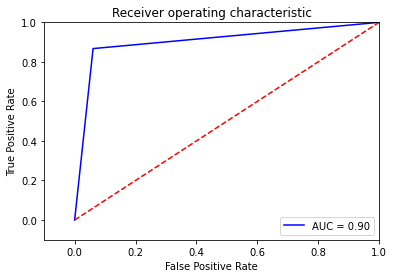

In [91]:
#This seems a good model but not soo good as gradient boosing algorithm
test_prediction = rfc.predict(x_test)
fpr,tpr,thresholds = roc_curve(y_test,test_prediction)
roc_auc = auc(fpr,tpr)
print(roc_auc)
#Plot ROC
plt.title('Receiver operating characteristic')
plt.plot(fpr, tpr,'b',label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc=0)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9236755308183879


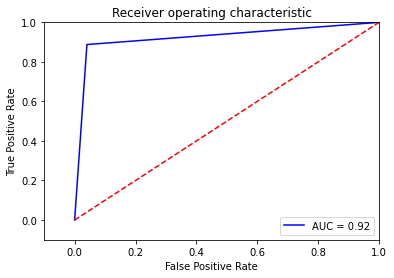

In [100]:
#This seems a very good model compare to previous models
test_prediction = xgbc.predict(x_test)

fpr,tpr,thresholds = roc_curve(y_test,test_prediction)
roc_auc = auc(fpr,tpr)
print(roc_auc)
#Plot ROC
plt.title('Receiver operating characteristic')
plt.plot(fpr, tpr,'b',label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc=0)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()